In [1]:
# Import packages & setup dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funky import extractor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# names=['ID', 'M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed','kick','Mrem', 'Srem', 'esca_v', 'Mcluster', 'gen']
df_gc = extractor('gc')
df_nsc = extractor('nsc')
df_ysc = extractor('ysc')

In [41]:
min_evo['gen_max'] = max_evo['gen']
display(min_evo.loc[179866])

ID           9.376030e+05
M1           1.474194e+01
M2           1.189302e+01
S1           7.448741e-01
S2           1.881038e-01
t_pair       7.528379e+02
t_elapsed    1.070508e+04
kick         1.034202e+03
Mrem         2.484032e+01
Srem         8.394658e-01
esca_v       8.546109e+01
Mcluster     1.970196e+06
gen          2.000000e+00
Z            1.200000e-02
gen_max      2.000000e+00
Name: 179866, dtype: float64

In [25]:
min_evo = df_nsc.loc[df_nsc.groupby(['ID', 'Z'])['gen'].idxmin()]

In [23]:
max_evo = df_nsc.loc[df_nsc.groupby(['ID', 'Z'])['gen'].idxmax()]

In [31]:
display(max_evo['gen'])

1384834    2
454541     2
1127292    2
2273539    2
712718     2
          ..
1993773    2
1365088    2
1993774    2
436228     2
436229     2
Name: gen, Length: 2579726, dtype: int64

In [42]:
display(min_evo.loc[2512697])

KeyError: 2512697

In [19]:
display(df_nsc[df_nsc['ID'] == 3])

,ID,M1,M2,S1,S2,t_pair,t_elapsed,kick,Mrem,Srem,esca_v,Mcluster,gen,Z
712719,3,41.330139,30.116377,0.741625,0.229488,97.874694,1331.429072,324.148642,66.590078,0.848847,90.721680,1.914263e+06,2,0.0040
2014319,3,17.683112,7.210770,0.734740,0.166489,143.371976,1896.415866,413.164334,23.498392,0.856831,128.226731,2.023020e+06,2,0.0004
2273540,3,24.650011,21.541346,0.721786,0.140758,34.088336,240.656150,61.334179,43.174773,0.824438,76.284155,6.728556e+05,2,0.0020
2512697,3,43.174773,21.514098,0.824438,0.194121,19.155048,359.091846,365.932916,60.399163,0.881965,76.284155,6.728556e+05,3,0.0020


In [23]:
# separate test set, create label set
selected_features = ['t_elapsed', 't_pair', 'esca_v', 'Z']
nsc_train, nsc_test, escaped_train, escaped_test = train_test_split(max_evo[selected_features], max_evo['gen'], test_size=0.2)


forest = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=1758, n_jobs=-1, class_weight='balanced')

#search = GridSearchCV(forest, {'max_depth':[3, 10, 30]}, verbose=4)
#search.fit(gc_train, escaped_train)

In [25]:
forest.fit(nsc_train, escaped_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=20,
                       n_jobs=-1, random_state=1758)

In [2]:
#(forbest := search.best_estimator_).fit(gc_test, escaped_test)

In [28]:
print(forest.score(nsc_test, escaped_test))

0.8219623749617095


In [29]:
importances = pd.Series(forest.feature_importances_, index=list(df_nsc[selected_features]))

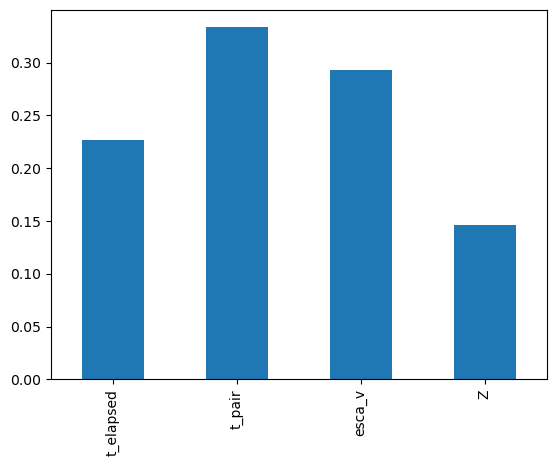

In [30]:
importances.plot.bar()
plt.show()

# Grafici

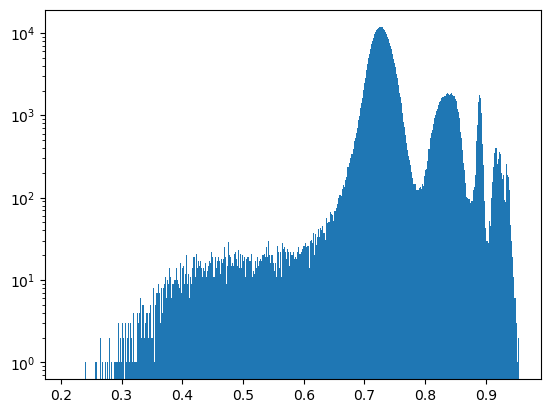

In [32]:
plt.hist(max_evo['S1'], 'auto')
plt.yscale('log')
plt.show()

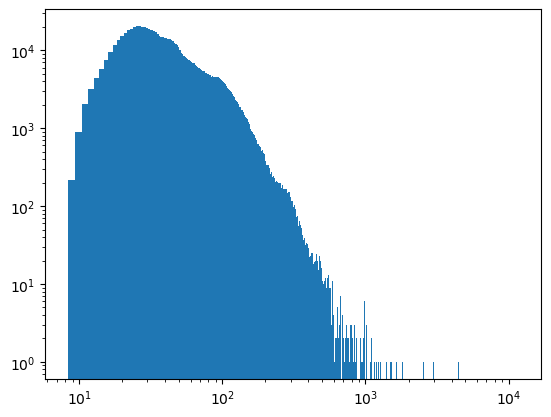

In [34]:
plt.hist(max_evo['Mrem'], 'auto')
plt.xscale('log')
plt.yscale('log')
plt.show()

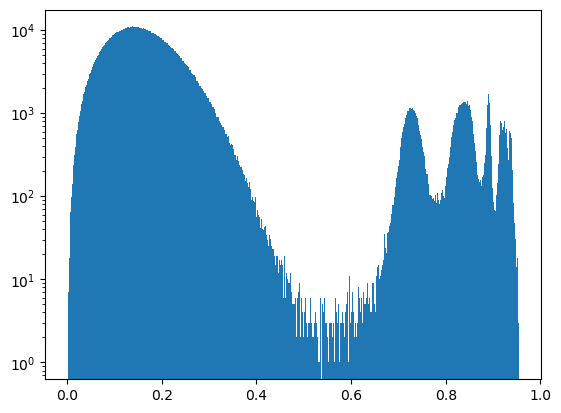

In [33]:
plt.hist(max_evo['S2'], 'auto')
plt.yscale('log')
plt.show()

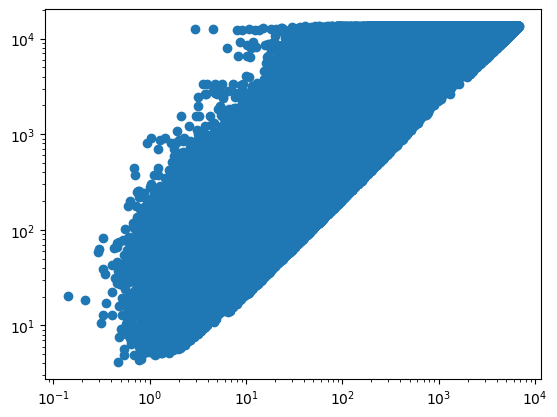

In [26]:
plt.scatter(df_nsc['t_pair'], df_nsc['t_elapsed'])
plt.xscale('log')
plt.yscale('log')
plt.show()

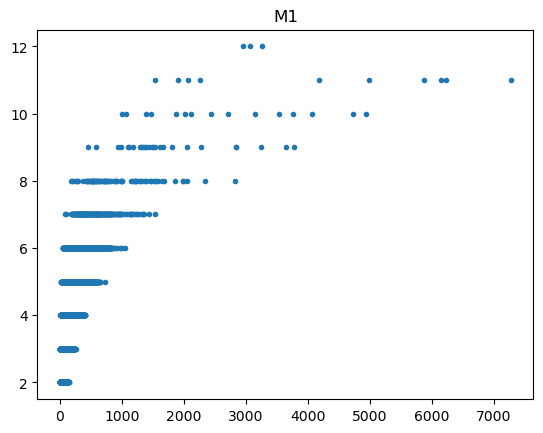

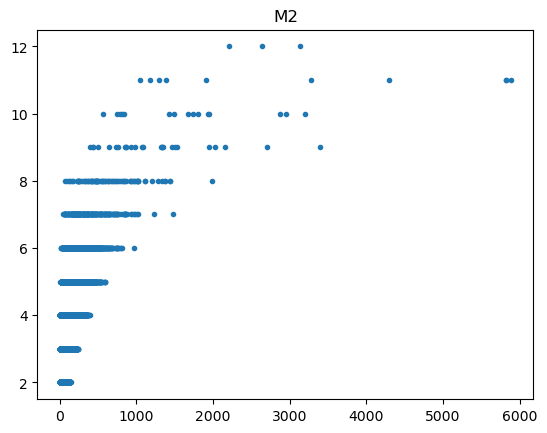

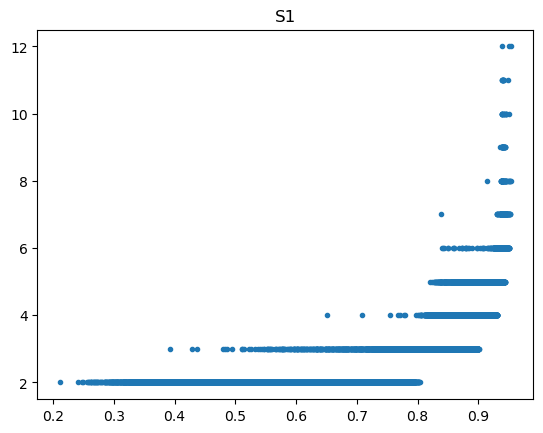

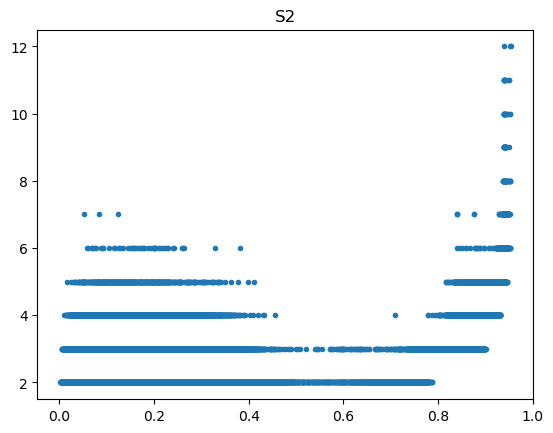

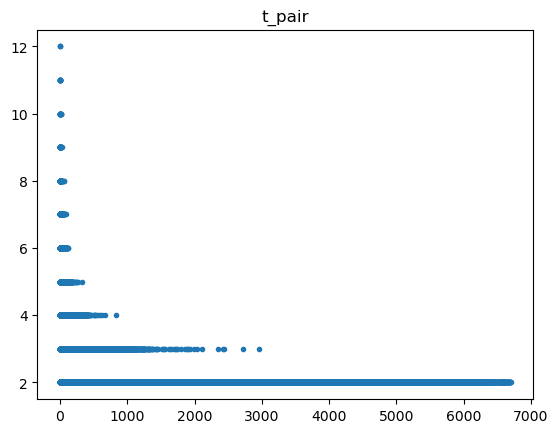

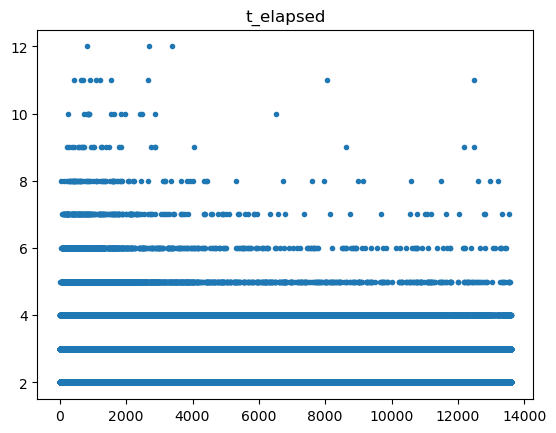

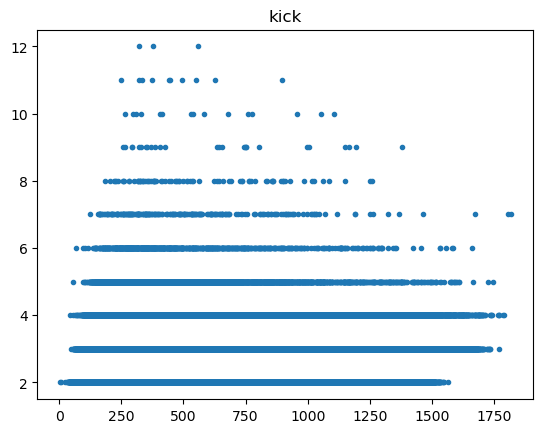

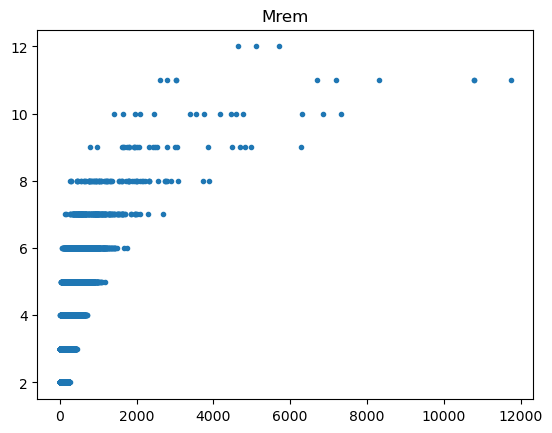

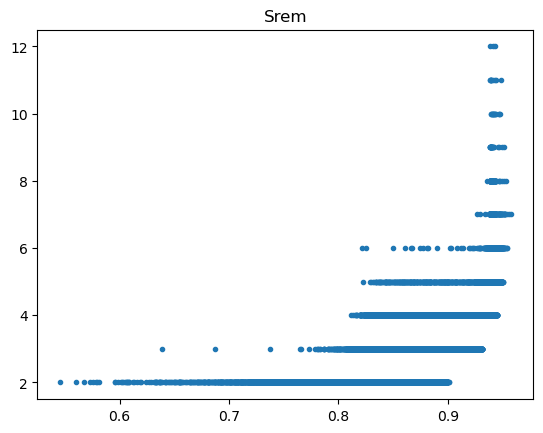

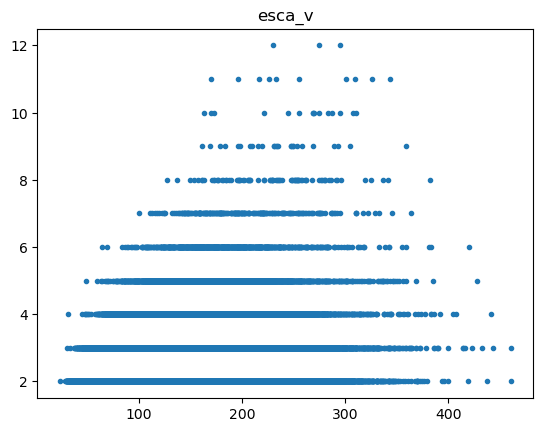

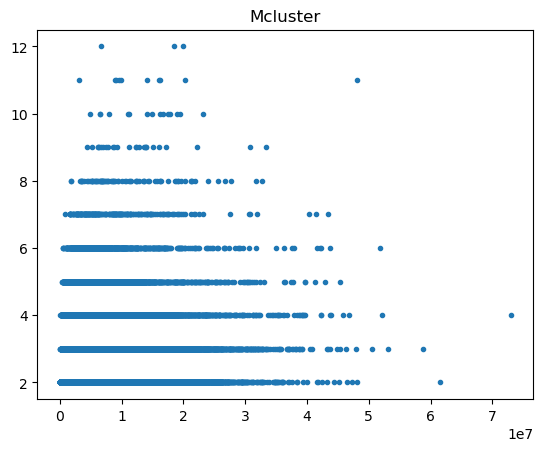

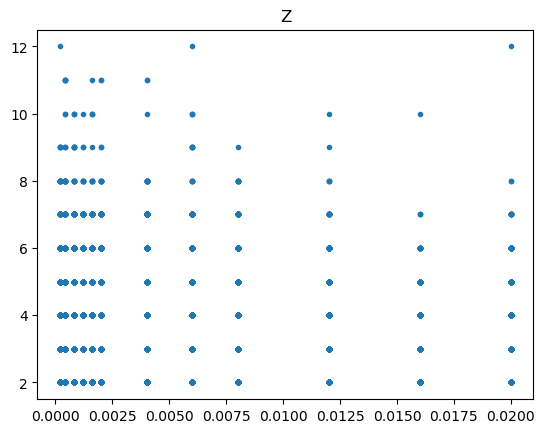

In [9]:
selected_feat = ['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed','kick','Mrem', 'Srem', 'esca_v', 'Mcluster', 'Z']

for feat in selected_feat:# un plot per selected
    plt.xscale('linear') 
    plt.scatter(max_evo[feat], max_evo['gen'],marker='.')
    plt.title(feat)
    plt.show()

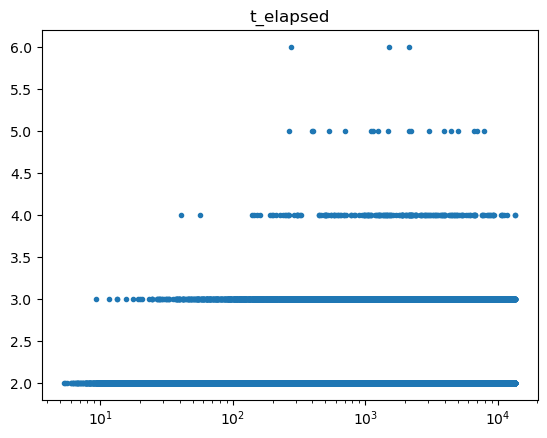

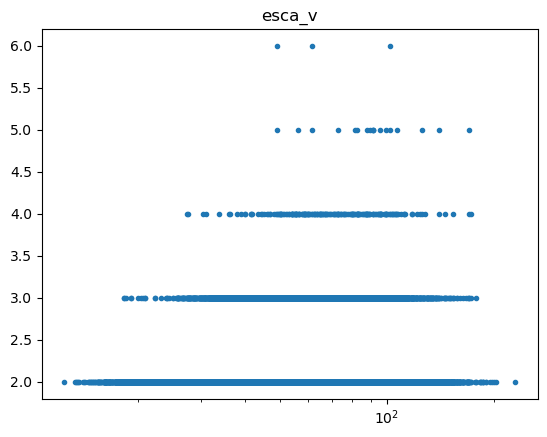

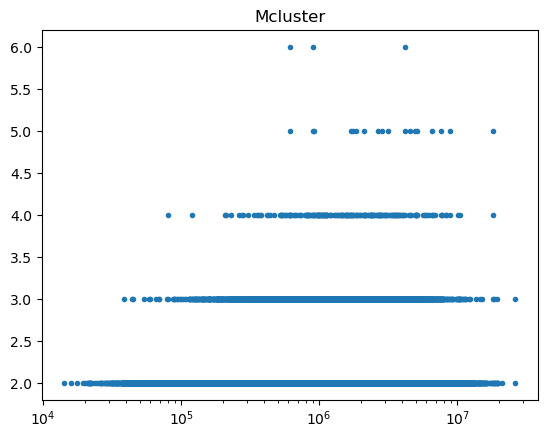

In [25]:
selected_feat = ['t_elapsed', 'esca_v', 'Mcluster']

for feat in selected_feat:# un plot per selected
    plt.xscale('log') 
    plt.scatter(df_gc[feat], df_gc['gen'],marker='.')
    plt.title(feat)
    plt.show()

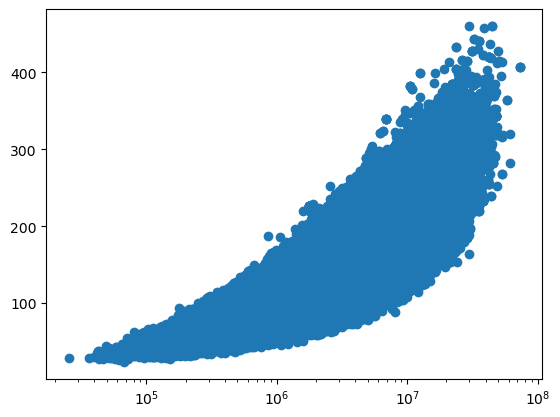

In [24]:
plt.scatter(df_nsc['Mcluster'], df_nsc['esca_v'])
plt.xscale('log')
plt.show()